# TP 2 - Organización Datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#agosto13 = pd.read_csv('1308.csv')
#septiembre13 = pd.read_csv('1309.csv')
#octubre13 = pd.read_csv('1310.csv')
#noviembre13 = pd.read_csv('1311.csv')
#diciembre13 = pd.read_csv('1312.csv')
#enero14 = pd.read_csv('1401.csv')
#febrero14 = pd.read_csv('1402.csv')
#marzo14 = pd.read_csv('1403.csv')
#abril14 = pd.read_csv('1404.csv')
#mayo14 = pd.read_csv('1405.csv')
#junio14 = pd.read_csv('1406.csv')
#enero15 = pd.read_csv('1501.csv')
#agosto15 = pd.read_csv('1508.csv')
#marzo16 = pd.read_csv('1603.csv')
#abril16 = pd.read_csv('1604.csv')
#mayo16 = pd.read_csv('1605.csv')
#junio16 = pd.read_csv('1606.csv')
#enero17 = pd.read_csv('1701.csv')
#agosto17 = pd.read_csv('1708.csv')

agosto13 = pd.read_csv('resources/properati-AR-2013-08-01-properties-sell.csv')
septiembre13 = pd.read_csv('resources/properati-AR-2013-09-01-properties-sell.csv')
octubre13 = pd.read_csv('resources/properati-AR-2013-10-01-properties-sell.csv')
noviembre13 = pd.read_csv('resources/properati-AR-2013-11-01-properties-sell.csv')
diciembre13 = pd.read_csv('resources/properati-AR-2013-12-01-properties-sell.csv')
enero14 = pd.read_csv('resources/properati-AR-2014-01-01-properties-sell.csv')
febrero14 = pd.read_csv('resources/properati-AR-2014-02-01-properties-sell.csv')
marzo14 = pd.read_csv('resources/properati-AR-2014-03-01-properties-sell.csv')
abril14 = pd.read_csv('resources/properati-AR-2014-04-01-properties-sell.csv')
mayo14 = pd.read_csv('resources/properati-AR-2014-05-01-properties-sell.csv')
junio14 = pd.read_csv('resources/properati-AR-2014-06-01-properties-sell.csv')
enero15 = pd.read_csv('resources/properati-AR-2015-01-01-properties-sell-six_months.csv')
agosto15 = pd.read_csv('resources/properati-AR-2015-08-01-properties-sell-six_months.csv')
marzo16 = pd.read_csv('resources/properati-AR-2016-03-01-properties-sell-six_months.csv')
abril16 = pd.read_csv('resources/properati-AR-2016-04-01-properties-sell.csv')
mayo16 = pd.read_csv('resources/properati-AR-2016-05-01-properties-sell.csv')
junio16 = pd.read_csv('resources/properati-AR-2016-06-01-properties-sell.csv')
enero17 = pd.read_csv('resources/properati-AR-2017-07-01-properties-sell-six_months.csv')
agosto17 = pd.read_csv('resources/properati-AR-2017-08-01-properties-sell.csv')


datos = pd.concat([agosto13, septiembre13, octubre13, noviembre13, diciembre13, enero14, febrero14, \
                          marzo14, abril14, mayo14, junio14, enero15, agosto15, marzo16, abril16, mayo16, \
                          junio16, enero17, agosto17])

#datosForTesting = pd.read_csv('properati_dataset_testing_noprice.csv')
datosForTesting = pd.read_csv('resources/properati_dataset_testing_noprice.csv')

Algunos primeros datos del set a testear. Vemos que los únicos campos con bajo porcentaje de datos son el piso y las expensas.

In [2]:
datos = datos.loc[:, ['id', 'created_on',  'property_type', 'operation', 'place_name', \
                      'place_with_parent_names', 'country_name', 'state_name', 'lat-lon', 'lat', 'lon', \
                     'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'description',\
                     'price_aprox_usd']]
datos.columns

Index(['id', 'created_on', 'property_type', 'operation', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor',
       'rooms', 'expenses', 'description', 'price_aprox_usd'],
      dtype='object')

In [6]:
datosForTesting.loc[datosForTesting.operation == 'alquiler','id'].count()

1

In [5]:
#print datosForTesting.operation.unique()
print(datosForTesting.operation.unique())

['venta' 'alquiler']


In [7]:
#print datosForTesting.property_type.unique()
print(datosForTesting.property_type.unique())

['departamento' 'ph' 'casa']


In [8]:
#Vemos que el set de datos a testear no contiene stores, eliminamos del set de entrenamiento.
datos = datos.loc[datos.property_type != 'store', :]
datos.count()

id                          465972
created_on                 1185654
property_type              1185654
operation                  1185654
place_name                 1185587
place_with_parent_names    1185654
country_name                465972
state_name                  465972
lat-lon                     985741
lat                         985741
lon                         985730
surface_total_in_m2         310527
surface_covered_in_m2       376151
floor                       158864
rooms                       830826
expenses                     58524
description                 465951
price_aprox_usd             983714
dtype: int64

In [9]:
 def traducirTipoPropiedad(x):
    tipo = ''
    if (x == 'house'):
        tipo = 'casa' 
    else:
        if (x == 'apartment'): 
            tipo = 'departamento'
        else: 
            if (x == 'PH'): 
                tipo = 'ph'
    return tipo        

In [10]:
datos['property_type'] = datos['property_type'].map(traducirTipoPropiedad)
datos.loc[datos.property_type == 'casa','id'].count()

177850

In [18]:
datos = datos.loc[(datos['state_name'].str.contains('Capital Federal')| \
                   datos['state_name'].str.contains('Bs.As. G.B.A. Zona Sur')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Oeste')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Norte')),:]
datos.count()

id                         321215
created_on                 321215
property_type              321215
operation                  321215
place_name                 321148
place_with_parent_names    321215
country_name               321215
state_name                 321215
lat-lon                    222166
lat                        222166
lon                        222166
surface_total_in_m2        229312
surface_covered_in_m2      278374
floor                       40599
rooms                      169791
expenses                    36608
description                321200
price_aprox_usd            293228
dtype: int64

In [19]:
datos = datos.loc[datos['price_aprox_usd'].notnull(),:]
datos = datos.loc[datos['price_aprox_usd'] != 0,:]
datos.count()

id                         281951
created_on                 281951
property_type              281951
operation                  281951
place_name                 281885
place_with_parent_names    281951
country_name               281951
state_name                 281951
lat-lon                    193706
lat                        193706
lon                        193706
surface_total_in_m2        203700
surface_covered_in_m2      251872
floor                       38473
rooms                      145729
expenses                    34945
description                281936
price_aprox_usd            281951
dtype: int64

# Primera prueba, palermo vs no-palermo

### Probamos con un set de datos que ya conocemos el precio, para ver el funcionamiento de los algoritmos

In [20]:
#Se hace la comparacion por lat, lon, superficie y superficie cubierta, tengo que quitar los nulls de esos campos
datosSinNull = datos.loc[datos['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]

#Luego de esos divido los que estan en palermo de los que no estan en palermo
datosPalermo = datosSinNull.loc[datosSinNull.place_name == 'Palermo', :]
datosNoPalermo = datosSinNull.loc[datosSinNull.place_name != 'Palermo', :]

#Divido al set de palermo en otros features y precios
datosPalermoFeatures = datosPalermo.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosPalermoPrecio = datosPalermo.loc[:, ['price_aprox_usd']]

#Divido al set que no es de palermo en otros features y precios
datosNoPalermoFeatures = datosNoPalermo.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosNoPalermoPrecio = datosNoPalermo.loc[:, ['price_aprox_usd']]

In [21]:
#Importo todas las librerias correspondientes a ML
#Para score
from sklearn.metrics import r2_score

#Para training y cross
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#Algoritmos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import gaussian_process
from sklearn import neural_network

#Pre-procesamiento
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


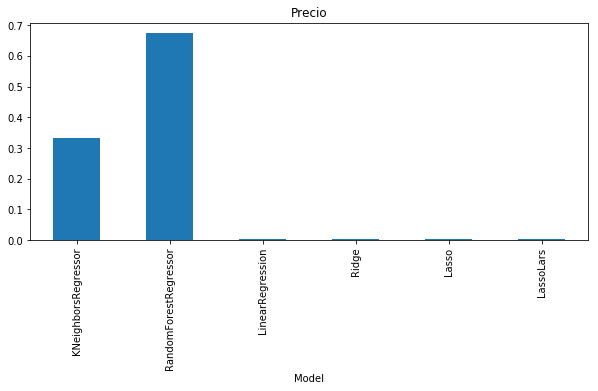

In [22]:
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         #RadiusNeighborsRegressor(),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1)]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(datosNoPalermoFeatures, datosNoPalermoPrecio)
        tmp['Precio'] = r2_score(datosPalermoPrecio, model.predict(datosPalermoFeatures))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optim

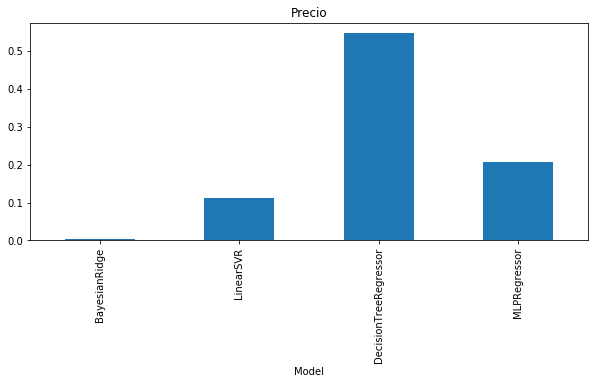

In [23]:
models = [linear_model.BayesianRidge(),
         #LogisticRegression(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         #gaussian_process.GaussianProcessRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(datosNoPalermoFeatures, datosNoPalermoPrecio)
        tmp['Precio'] = r2_score(datosPalermoPrecio, model.predict(datosPalermoFeatures))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

En base a estas pruebas, vemos que los algoritmos que mejor performance tienen con el set de datos es RandomForest, KNN y DecisionTree

# Primera prueba con split del set de datos

In [24]:
#Split del set de datos prueba 1
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)

In [25]:
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


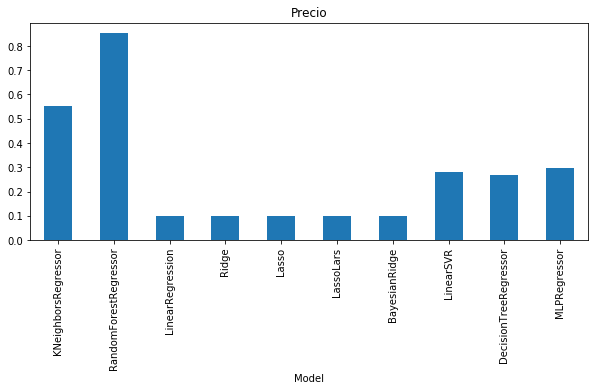

In [26]:
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

# Segunda prueba con split del set de datos

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


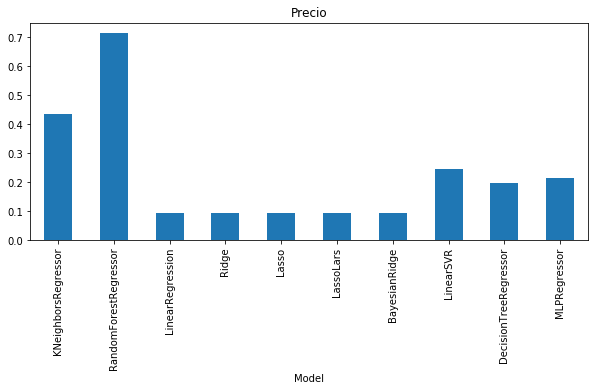

In [27]:
#Prueba 2
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

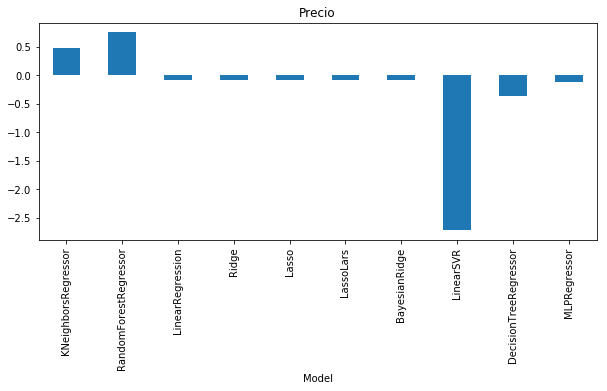

In [28]:
#Prueba 3
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

# Prueba de algoritmos para cross validation

In [29]:
datosFiltradosFeatures = datosFiltrados.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosFiltradosPrecios = datosFiltrados.loc[:, ['price_aprox_usd']]

In [30]:
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.38995168,  0.91506301,  0.87382352,  0.78066009,  0.82446721])

In [31]:
RFRModel = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.32320645,  0.90481454,  0.86508143,  0.63397217,  0.80908594])

In [32]:
RFRModel = RandomForestRegressor()
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.31709098,  0.9017197 ,  0.84483048,  0.63994731,  0.79570738])

In [33]:
RFRModel = RandomForestRegressor(n_estimators=50, max_features=2)
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.38433842,  0.91093427,  0.88668106,  0.77111773,  0.81901253])

In [34]:
KNModel = KNeighborsRegressor()
scores = cross_val_score(KNModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.17272264,  0.65380605,  0.56761734,  0.45272176,  0.54172758])

In [35]:
LRModel =  LinearRegression()
scores = cross_val_score(LRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores   

array([ 0.05950573, -0.13649142, -0.06616694,  0.0758989 ,  0.08334829])

In [36]:
model = linear_model.Ridge (alpha = .5)
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores  

array([ 0.05950579, -0.1364914 , -0.06616693,  0.07589889,  0.08334828])

In [37]:
model = linear_model.Lasso (alpha = 0.1)
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores  

array([ 0.05950583, -0.13649139, -0.06616693,  0.07589889,  0.08334828])

In [38]:
model = linear_model.LassoLars (alpha = 0.1)
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores    

array([ 0.05952237, -0.13631007, -0.06605521,  0.07586682,  0.08330931])

In [39]:
model = model = linear_model.BayesianRidge()
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.0596594 , -0.13643175, -0.06615379,  0.07588334,  0.08333617])

In [40]:
model = svm.LinearSVR()
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores   

array([-0.08500805, -3.90033735, -2.70579994,  0.1727671 ,  0.26871268])

In [41]:
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores    

array([ 0.05838336,  0.89140018,  0.81245531,  0.22200604,  0.78502745])

In [42]:
model = neural_network.MLPRegressor()
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([ 0.17708718, -0.16705888, -0.09453538,  0.29138281,  0.09785791])

En base a estos scores obtenidos, concluimos que nuestro mejor algoritmo para pruebas es Random Forest.

# Primera estimación al set de prueba para Kaggle

In [47]:
#primera estimacion al set de prueba
primeraPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [48]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(primeraPrueba)

array([[ -34.61098776,  -58.36346358,    0.        ,   64.        ],
       [ -34.612651  ,  -58.4432756 ,    0.        ,   64.        ],
       [ -34.58936332,  -58.41287986,   53.        ,   48.        ],
       ..., 
       [ -34.7585252 ,  -58.4097202 ,  219.        ,  135.        ],
       [ -34.56322108,  -58.46105268,   62.        ,   48.        ],
       [ -34.70919169,  -58.53028938,  367.        ,  130.        ]])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(datosFiltrados.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']], datosFiltrados['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba1 = RFRModel.predict(imp.fit_transform(primeraPrueba))

In [ ]:
archivo1 = pd.DataFrame()
archivo1['id'] = datosForTesting.loc[:,['id']]
archivo1['price_usd'] = prueba1
archivo1.to_csv('prueba1.csv', index=False)

# Segunda estimación para el set de prueba

En esta prueba, transformamos los valores de las propiedades a boooleanos, de forma de poder ser aplicados al entrenamiento

In [50]:
#One hot encoding para tipo de propiedad
datosForTesting['EsCasa'] = datosForTesting['property_type'].str.contains('casa')
datosForTesting['EsDpto'] = datosForTesting['property_type'].str.contains('departamento')
datosForTesting['EsPH'] = datosForTesting['property_type'].str.contains('ph')
datos['EsCasa'] = datos['property_type'].str.contains('casa')
datos['EsDpto'] = datos['property_type'].str.contains('departamento')
datos['EsPH'] = datos['property_type'].str.contains('ph')

In [51]:
#segunda estimacion al set de prueba
#En vez de filtrar los registros que tienen features con null, los relleno con la media
segundaPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH']]
datosPrueba2 = datos.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [52]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
segundaPrueba = imp.fit_transform(segundaPrueba)
datosPrueba2 = imp.fit_transform(datosPrueba2)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(datosPrueba2, datos['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba2 = RFRModel.predict(imp.fit_transform(segundaPrueba))
#prueba2

In [ ]:
archivo2 = pd.DataFrame()
archivo2['id'] = datosForTesting.loc[:,['id']]
archivo2['price_usd'] = prueba2
archivo2.to_csv('prueba2.csv', index=False)

# Tercera estimación para el set de prueba

In [58]:
#No hubo mejoras con respecto a la prueba 1, vuelvo a filtrar los nulos
#tercera estimacion al set de prueba
terceraPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH']]
datosPrueba3 = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

x_train, x_test, y_train, y_test = train_test_split(datosPrueba3, datosSinNull['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba3 = RFRModel.predict(imp.fit_transform(terceraPrueba))

In [ ]:
archivo3 = pd.DataFrame()
archivo3['id'] = datosForTesting.loc[:,['id']]
archivo3['price_usd'] = prueba3
archivo3.to_csv('prueba3.csv', index=False)

# Cuarta estimación para el set de prueba

In [65]:
#Al no haber mejoras significativas voy a tratar de limpiar un poco mejor el set de datos de entrenamiento
def split_place_with_parent_names_localidad(x):
    z=x.split("|")
    return z[3]

datos['localidad'] = datos['place_with_parent_names'].map(split_place_with_parent_names_localidad)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281951 entries, 2 to 187480
Data columns (total 22 columns):
id                         281951 non-null object
created_on                 281951 non-null object
property_type              281951 non-null object
operation                  281951 non-null object
place_name                 281885 non-null object
place_with_parent_names    281951 non-null object
country_name               281951 non-null object
state_name                 281951 non-null object
lat-lon                    193706 non-null object
lat                        193706 non-null float64
lon                        193706 non-null float64
surface_total_in_m2        203700 non-null float64
surface_covered_in_m2      251872 non-null float64
floor                      38473 non-null float64
rooms                      145729 non-null float64
expenses                   34945 non-null object
description                281936 non-null object
price_aprox_usd            281951 n

In [66]:
datosForTesting['localidad'] = datosForTesting['place_with_parent_names'].map(split_place_with_parent_names_localidad)
datosForTesting.head(5)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,EsCasa,EsDpto,EsPH,localidad
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,...,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...,False,True,False,Puerto Madero
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...,False,True,False,
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,...,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...,False,True,False,Palermo
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,False,True,False,Chacarita
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...,False,True,False,Chacarita


In [62]:
localidades = datosForTesting.localidad.unique()
localidades.size

81

In [67]:
def localidadEnSet(x):
    return x in localidades.tolist()

In [69]:
datosSinNull = datos.loc[datos['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]

datosSinNull['localidadEnSet'] = datosSinNull['localidad'].map(localidadEnSet)
datosPrueba4 = datosSinNull.loc[datosSinNull['localidadEnSet'] == True, :]

#Resultados anteriores:
#array([ 0.3193749 ,  0.90852784,  0.78727665,  0.74706295,  0.63907671])
RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))
scores = cross_val_score(RFRModel, datosPrueba4.loc[:,['lat', 'lon', 'surface_total_in_m2', \
                            'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], np.ravel(datosPrueba4['price_aprox_usd']), cv=5)
scores

array([ 0.34223893,  0.96270967,  0.88510502,  0.8569523 ,  0.82646218])

In [70]:
RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=150))
scores = cross_val_score(RFRModel, datosPrueba4.loc[:,['lat', 'lon', 'surface_total_in_m2', \
                            'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], np.ravel(datosPrueba4['price_aprox_usd']), cv=10)
scores

array([ 0.05935582,  0.68177901,  0.98142643,  0.98333018,  0.87488619,
        0.80608649,  0.832581  ,  0.8408704 ,  0.92283192,  0.35545586])

In [71]:
datosPrueba4 = datosPrueba4.loc[datosPrueba4['surface_total_in_m2'] < 150000, :]
datosPrueba4['surface_total_in_m2'].describe()

count    102783.000000
mean        141.648473
std         668.710715
min           0.000000
25%          44.000000
50%          72.000000
75%         150.000000
max      100000.000000
Name: surface_total_in_m2, dtype: float64

In [72]:
RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))
scores = cross_val_score(RFRModel, datosPrueba4.loc[:,['lat', 'lon', 'surface_total_in_m2', \
                            'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], np.ravel(datosPrueba4['price_aprox_usd']), cv=5)
scores

array([ 0.33883064,  0.96059814,  0.8757603 ,  0.86255338,  0.82842141])

In [73]:
RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=150, max_features='sqrt'))
scores = cross_val_score(RFRModel, datosPrueba4.loc[:,['lat', 'lon', 'surface_total_in_m2', \
                            'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], np.ravel(datosPrueba4['price_aprox_usd']), cv=5)
scores

array([ 0.34167804,  0.96349449,  0.88338754,  0.85698915,  0.82907537])

In [74]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
cuartaPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH']]
x_train, x_test, y_train, y_test = train_test_split(datosPrueba4.loc[:,['lat', 'lon', 'surface_total_in_m2', \
                            'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], datosPrueba4['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba4 = RFRModel.predict(imp.fit_transform(cuartaPrueba))
prueba4

array([ 364775.83371746,  143547.7221619 ,  190005.27177778, ...,
        174785.06826667,  157173.56711111,  152055.97876825])

In [ ]:
archivo4 = pd.DataFrame()
archivo4['id'] = datosForTesting.loc[:,['id']]
archivo4['price_usd'] = prueba4
archivo4
archivo4.to_csv('prueba4.csv', index=False)

# Quinta estimación para el set de prueba

In [75]:
#Creamos un place_name_id para agregar a la query
barrios = pd.concat([pd.DataFrame([[barrio,0]], columns=['place_name','place_name_id']) for barrio in datosSinNull['place_name'].unique()]).reset_index()
barrios['place_name_id'] = barrios.index
barrios = barrios.loc[:,['place_name','place_name_id']]
barrios.head()

,place_name,place_name_id
0,Jose Marmol,0
1,Belgrano,1
2,Palermo Soho,2
3,Burzaco,3
4,Villa Devoto,4


In [76]:
def aBinario(x):
    return 1 if x == True else 0

In [77]:
datosWithPlaces = pd.merge(datosSinNull,barrios,how='left',on='place_name')
datosFiltradosWithPlaces = datosWithPlaces.loc[:, ['lat', \
                           'lon','surface_covered_in_m2','surface_total_in_m2',\
                           'price_aprox_usd', 'place_name_id', 'EsCasa', 'EsDpto', 'EsPH']]

datosFiltradosWithPlacesFeatures = datosFiltradosWithPlaces.loc[:, ['lat', 'lon','surface_covered_in_m2','surface_total_in_m2',\
                                              'place_name_id', 'EsCasa', 'EsDpto', 'EsPH']]
datosFiltradosWithPlacesPrecios = datosFiltradosWithPlaces.loc[:, ['price_aprox_usd']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

scores = cross_val_score(RFRModel, datosFiltradosWithPlacesFeatures, np.ravel(datosFiltradosWithPlacesPrecios), cv=5)

scores

array([ 0.41129491,  0.91260066,  0.88546915,  0.83033942,  0.83050222])

In [79]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
quintaPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH', 'place_name_id']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltradosWithPlaces.loc[:, \
             ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], \
                                                    datosFiltradosWithPlaces['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba5 = RFRModel.predict(imp.fit_transform(quintaPrueba))

#prueba5

In [ ]:
archivo5 = pd.DataFrame()
archivo5['id'] = datosForTesting.loc[:,['id']]
archivo5['price_usd'] = prueba5
archivo5
archivo5.to_csv('prueba5.csv', index=False)

# Sexta estimación al set de prueba

In [80]:
def split_place_with_parent_names_zona(x):
    z=x.split("|")
    return z[2]

datos['zona'] = datos['place_with_parent_names'].map(split_place_with_parent_names_zona)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281951 entries, 2 to 187480
Data columns (total 23 columns):
id                         281951 non-null object
created_on                 281951 non-null object
property_type              281951 non-null object
operation                  281951 non-null object
place_name                 281885 non-null object
place_with_parent_names    281951 non-null object
country_name               281951 non-null object
state_name                 281951 non-null object
lat-lon                    193706 non-null object
lat                        193706 non-null float64
lon                        193706 non-null float64
surface_total_in_m2        203700 non-null float64
surface_covered_in_m2      251872 non-null float64
floor                      38473 non-null float64
rooms                      145729 non-null float64
expenses                   34945 non-null object
description                281936 non-null object
price_aprox_usd            281951 n

In [81]:
#Saco nulos
datosSinNull = datos.loc[datos['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['price_aprox_usd'].notnull(),:]

#Me quedo solo con los que tienen la localidad en el set de datos
datosSinNull['localidadEnSet'] = datosSinNull['localidad'].map(localidadEnSet)
datosPrueba6 = datosSinNull.loc[datosSinNull['localidadEnSet'] == True, :]
datosPrueba6.columns

Index(['id', 'created_on', 'property_type', 'operation', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor',
       'rooms', 'expenses', 'description', 'price_aprox_usd', 'EsCasa',
       'EsDpto', 'EsPH', 'localidad', 'zona', 'localidadEnSet'],
      dtype='object')

In [82]:
prueba6Campos = datosPrueba6.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                               'EsCasa', 'EsDpto', 'EsPH']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, prueba6Campos, np.ravel(datosPrueba6['price_aprox_usd']), cv=5)
scores

array([ 0.34336234,  0.96236793,  0.88135876,  0.84523564,  0.83016371])

In [84]:
#Creamos un place_name_id para agregar a la query
barrios = pd.concat([pd.DataFrame([[barrio,0]], columns=['localidad','localidad_id']) for barrio in datosPrueba6['localidad'].unique()]).reset_index()
barrios['localidad_id'] = barrios.index
barrios = barrios.loc[:,['localidad','localidad_id']]

In [85]:
#Agregamos el id del barrio al set de entrenamiento
datosPrueba6 = pd.merge(datosPrueba6,barrios,how='left',on='localidad')
datosPrueba6.head(2)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,expenses,description,price_aprox_usd,EsCasa,EsDpto,EsPH,localidad,zona,localidadEnSet,localidad_id
0,4ba89da8e0e5f0677f3bf9b8da4e14c0ffc08ca1,2014-07-02,casa,sell,Jose Marmol,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.7875053,-58.3736059",-34.787505,...,NaN,CODIGO: 1520-MYR1925 ubicado en: Ferre 600 - ...,450000.0,True,False,False,Almirante Brown,Bs.As. G.B.A. Zona Sur,True,0
1,4c508b233a1495e7ba016684ae7a43c4bcc2f26c,2014-07-02,departamento,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.55814,-58.4614942",-34.558140,...,700,CODIGO: ubicado en: Roosevelt 2500 - Publica...,96000.0,False,True,False,Belgrano,Capital Federal,True,1


In [86]:
prueba6Campos = datosPrueba6.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, prueba6Campos, np.ravel(datosPrueba6['price_aprox_usd']), cv=5)
scores

array([ 0.34043374,  0.95376287,  0.88700095,  0.86013861,  0.82885982])

In [87]:
#One hot encoding para zona
datosPrueba6.head(5)
datosPrueba6['EsCap'] = datosPrueba6['zona'].str.contains('Capital Federal')
datosPrueba6['EsSur'] = datosPrueba6['zona'].str.contains('Bs.As. G.B.A. Zona Sur')
datosPrueba6['EsNor'] = datosPrueba6['zona'].str.contains('Bs.As. G.B.A. Zona Norte')
datosPrueba6['EsOes'] = datosPrueba6['zona'].str.contains('Bs.As. G.B.A. Zona Oeste')
datosPrueba6.columns

Index(['id', 'created_on', 'property_type', 'operation', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor',
       'rooms', 'expenses', 'description', 'price_aprox_usd', 'EsCasa',
       'EsDpto', 'EsPH', 'localidad', 'zona', 'localidadEnSet', 'localidad_id',
       'EsCap', 'EsSur', 'EsNor', 'EsOes'],
      dtype='object')

In [88]:
prueba6Campos = datosPrueba6.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, prueba6Campos, np.ravel(datosPrueba6['price_aprox_usd']), cv=5)
scores

array([ 0.34521413,  0.94364677,  0.89035594,  0.86659368,  0.8297176 ])

In [89]:
datosPrueba6['fecha'] = pd.to_datetime(datosPrueba6['created_on'], errors='coerce')
datosPrueba6['mes'] = datosPrueba6['fecha'].dt.month
datosPrueba6['año'] = datosPrueba6['fecha'].dt.year

In [90]:
#Filtro fechas para acotar un poco el set de datos y probar por años
datosPrueba2014 = datosPrueba6.loc[datosPrueba6['año'] == 2014, :]
datosPrueba2014Campos = datosPrueba2014.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba2014Campos, np.ravel(datosPrueba2014['price_aprox_usd']), cv=5)
scores

array([ 0.75886976,  0.78464796,  0.6917761 ,  0.40880321,  0.76617345])

In [91]:
datosPrueba2015 = datosPrueba6.loc[datosPrueba6['año'] == 2015, :]
datosPrueba2015Campos = datosPrueba2015.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba2015Campos, np.ravel(datosPrueba2015['price_aprox_usd']), cv=5)
scores

array([ 0.65578858,  0.1445552 ,  0.77659778,  0.94746366,  0.93427542])

In [92]:
datosPrueba2016 = datosPrueba6.loc[datosPrueba6['año'] == 2016, :]
datosPrueba2016Campos = datosPrueba2016.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba2016Campos, np.ravel(datosPrueba2016['price_aprox_usd']), cv=5)
scores

array([ 0.97937682,  0.97933864,  0.9874421 ,  0.86857762,  0.69933175])

In [93]:
datosPrueba2017 = datosPrueba6.loc[datosPrueba6['año'] == 2017, :]
datosPrueba2017Campos = datosPrueba2017.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba2017Campos, np.ravel(datosPrueba2017['price_aprox_usd']), cv=5)
scores

array([ 0.92375184,  0.86615214,  0.96912902,  0.90850153,  0.6358081 ])

In [94]:
datosPruebaMezcla = datosPrueba6.loc[((datosPrueba6['año'] == 2015) & (datosPrueba6['mes'] >5 )) | \
                                     ((datosPrueba6['año'] == 2016) & (datosPrueba6['mes'] < 6)), :]
datosPruebaMezclaCampos = datosPruebaMezcla.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPruebaMezclaCampos, np.ravel(datosPruebaMezcla['price_aprox_usd']), cv=5)
scores

array([ 0.70136989,  0.98127143,  0.98875583,  0.98947865,  0.97842989])

In [95]:
datosPruebaMezcla2 = datosPrueba6.loc[((datosPrueba6['año'] == 2015) & (datosPrueba6['mes'] > 8 )) | \
                                     ((datosPrueba6['año'] == 2016) & (datosPrueba6['mes'] < 6)), :]
datosPruebaMezcla2Campos = datosPruebaMezcla2.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPruebaMezcla2Campos, np.ravel(datosPruebaMezcla2['price_aprox_usd']), cv=5)
scores

array([ 0.96719224,  0.9792876 ,  0.99480877,  0.99012877,  0.97956228])

In [97]:
#datosForTesting = pd.read_csv('properati_dataset_testing_noprice.csv')
datosForTesting = pd.read_csv('resources/properati_dataset_testing_noprice.csv')
datosForTesting.columns

Index(['id', 'created_on', 'property_type', 'operation', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor',
       'rooms', 'expenses', 'description'],
      dtype='object')

In [98]:
datosForTesting['zona'] = datosForTesting['place_with_parent_names'].map(split_place_with_parent_names_zona)
datosForTesting['localidad'] = datosForTesting['place_with_parent_names'].map(split_place_with_parent_names_localidad)
datosForTesting.head(5)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,zona,localidad
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...,Capital Federal,Puerto Madero
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...,Buenos Aires Interior,
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...,Capital Federal,Palermo
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,Capital Federal,Chacarita
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...,Capital Federal,Chacarita


In [99]:
datosForTesting = pd.merge(datosForTesting,barrios,how='left',on='localidad')

In [100]:
datosForTesting['zona'] = datosForTesting['place_with_parent_names'].map(split_place_with_parent_names_zona)
datosForTesting['EsCap'] = datosForTesting['zona'].str.contains('Capital Federal')
datosForTesting['EsSur'] = datosForTesting['zona'].str.contains('Bs.As. G.B.A. Zona Sur')
datosForTesting['EsNor'] = datosForTesting['zona'].str.contains('Bs.As. G.B.A. Zona Norte')
datosForTesting['EsOes'] = datosForTesting['zona'].str.contains('Bs.As. G.B.A. Zona Oeste')
datosForTesting['EsCasa'] = datosForTesting['property_type'].str.contains('casa')
datosForTesting['EsDpto'] = datosForTesting['property_type'].str.contains('departamento')
datosForTesting['EsPH'] = datosForTesting['property_type'].str.contains('ph')
datosForTesting.head(5)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,zona,localidad,localidad_id,EsCap,EsSur,EsNor,EsOes,EsCasa,EsDpto,EsPH
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,...,Capital Federal,Puerto Madero,60,True,False,False,False,False,True,False
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,...,Buenos Aires Interior,,71,False,False,False,False,False,True,False
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,...,Capital Federal,Palermo,2,True,False,False,False,False,True,False
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,Capital Federal,Chacarita,28,True,False,False,False,False,True,False
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,Capital Federal,Chacarita,28,True,False,False,False,False,True,False


In [101]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
sextaPrueba = datosForTesting.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

x_train, x_test, y_train, y_test = train_test_split(datosPruebaMezcla2Campos, \
                                                    np.ravel(datosPruebaMezcla2['price_aprox_usd']), test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba6 = RFRModel.predict(imp.fit_transform(sextaPrueba))

prueba6

array([ 335462.78683333,  117216.98666667,  239217.5       , ...,
        173163.3042    ,  153062.42      ,  221647.2922    ])

In [ ]:
archivo6 = pd.DataFrame()
archivo6['id'] = datosForTesting.loc[:,['id']]
archivo6['price_usd'] = prueba6
archivo6
archivo6.to_csv('prueba6.csv', index=False)

# Septima estimacion

In [117]:
datosSinNull.localidad = datosSinNull.localidad.str.upper()
datosSinNull.localidad = datosSinNull.localidad.str.replace('Á','A')
datosSinNull.localidad = datosSinNull.localidad.str.replace('É','E')
datosSinNull.localidad = datosSinNull.localidad.str.replace('Í','I')
datosSinNull.localidad = datosSinNull.localidad.str.replace('Ó','O')
datosSinNull.localidad = datosSinNull.localidad.str.replace('Ú','U')
datosSinNull.localidad = datosSinNull.localidad.str.replace('Ñ','N')

In [118]:
datosForTesting.localidad = datosForTesting.localidad.str.upper()
datosForTesting.localidad = datosForTesting.localidad.str.replace('Á','A')
datosForTesting.localidad = datosForTesting.localidad.str.replace('É','E')
datosForTesting.localidad = datosForTesting.localidad.str.replace('Í','I')
datosForTesting.localidad = datosForTesting.localidad.str.replace('Ó','O')
datosForTesting.localidad = datosForTesting.localidad.str.replace('Ú','U')
datosForTesting.localidad = datosForTesting.localidad.str.replace('Ñ','N')
datosForTesting.localidad.unique()

array(['PUERTO MADERO', '', 'PALERMO', 'CHACARITA', 'COLEGIALES',
       'ALMAGRO', 'BELGRANO', 'VILLA CRESPO', 'CABALLITO', 'BOEDO',
       'PARQUE PATRICIOS', 'RECOLETA', 'LOMAS DE ZAMORA', 'FLORES',
       'LA PLATA', 'NUNEZ', 'MATADEROS', 'MORON', 'MONSERRAT',
       'TRES DE FEBRERO', 'BOCA', 'BERAZATEGUI', 'VILLA URQUIZA',
       'ESTEBAN ECHEVERRIA', 'VILLA LURO', 'COGHLAN', 'BARRIO NORTE',
       'VILLA DEVOTO', 'BARRACAS', 'LAS CANITAS', 'PATERNAL', 'AVELLANEDA',
       'LA MATANZA', 'MONTE CASTRO', 'RETIRO', 'VILLA PUEYRREDON',
       'PARQUE CHACABUCO', 'LANUS', 'MORENO', 'LINIERS', 'CONGRESO',
       'CENTRO / MICROCENTRO', 'VILLA LUGANO', 'PARQUE AVELLANEDA',
       'SAN CRISTOBAL', 'POMPEYA', 'ALMIRANTE BROWN', 'SAAVEDRA',
       'ITUZAINGO', 'TRIBUNALES', 'VILLA ORTUZAR', 'BALVANERA', 'ONCE',
       'QUILMES', 'SAN NICOLAS', 'CONSTITUCION', 'FLORESTA', 'EZEIZA',
       'VILLA DEL PARQUE', 'VILLA SANTA RITA', 'SAN TELMO', 'CANUELAS',
       'HURLINGHAM', 'FLORENCIO VARELA

In [119]:
datosPrueba7 = datosSinNull.loc[datosSinNull['localidadEnSet'] == True, :]
datosPrueba7 = pd.merge(datosPrueba7,barrios,how='left',on='localidad')
datosPrueba7['EsCap'] = datosPrueba7['zona'].str.contains('Capital Federal')
datosPrueba7['EsSur'] = datosPrueba7['zona'].str.contains('Bs.As. G.B.A. Zona Sur')
datosPrueba7['EsNor'] = datosPrueba7['zona'].str.contains('Bs.As. G.B.A. Zona Norte')
datosPrueba7['EsOes'] = datosPrueba7['zona'].str.contains('Bs.As. G.B.A. Zona Oeste')
datosPrueba7.head(5)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,EsDpto,EsPH,localidad,zona,localidadEnSet,localidad_id,EsCap,EsSur,EsNor,EsOes
0,4ba89da8e0e5f0677f3bf9b8da4e14c0ffc08ca1,2014-07-02,casa,sell,Jose Marmol,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.7875053,-58.3736059",-34.787505,...,False,False,ALMIRANTE BROWN,Bs.As. G.B.A. Zona Sur,True,0,False,True,False,False
1,4c508b233a1495e7ba016684ae7a43c4bcc2f26c,2014-07-02,departamento,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.55814,-58.4614942",-34.558140,...,True,False,BELGRANO,Capital Federal,True,1,True,False,False,False
2,1e0ec350dd33b32977e6da279fdd9e4ebf870d0d,2014-07-02,ph,sell,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5881288,-58.4331522",-34.588129,...,False,True,PALERMO,Capital Federal,True,2,True,False,False,False
3,d8470085f8f543f16e0d28b7f38fb2354ab9ce92,2014-07-02,casa,sell,Burzaco,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.8273730973,-58.3935291244",-34.827373,...,False,False,ALMIRANTE BROWN,Bs.As. G.B.A. Zona Sur,True,0,False,True,False,False
4,4efac79c0ede6d23f5ef3f9b57096fd6ef503cb0,2014-07-02,departamento,sell,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Argentina,Capital Federal,"-34.5911545,-58.5101735",-34.591155,...,True,False,VILLA DEVOTO,Capital Federal,True,3,True,False,False,False


In [120]:
barrios = pd.concat([pd.DataFrame([[barrio,0]], columns=['localidad','localidad_id']) for barrio in datosPrueba7['localidad'].unique()]).reset_index()
barrios['localidad_id'] = barrios.index
barrios = barrios.loc[:,['localidad','localidad_id']]

In [121]:
datosForTesting['clave'] = datosForTesting.property_type + ' - ' + datosForTesting.localidad
claves = datosForTesting['clave'].unique()
print(claves)

['departamento - PUERTO MADERO' 'departamento - ' 'departamento - PALERMO'
 'departamento - CHACARITA' 'departamento - COLEGIALES'
 'departamento - ALMAGRO' 'departamento - BELGRANO'
 'departamento - VILLA CRESPO' 'departamento - CABALLITO' 'ph - BOEDO'
 'ph - PARQUE PATRICIOS' 'departamento - RECOLETA' 'casa - LOMAS DE ZAMORA'
 'departamento - FLORES' 'ph - FLORES' 'departamento - LA PLATA'
 'casa - NUNEZ' 'departamento - MATADEROS' 'casa - MORON' 'casa - '
 'departamento - MONSERRAT' 'departamento - TRES DE FEBRERO'
 'departamento - BOCA' 'casa - LA PLATA' 'ph - LA PLATA'
 'departamento - BOEDO' 'ph - LOMAS DE ZAMORA' 'casa - BERAZATEGUI'
 'departamento - VILLA URQUIZA' 'departamento - LOMAS DE ZAMORA'
 'departamento - ESTEBAN ECHEVERRIA' 'departamento - VILLA LURO'
 'departamento - COGHLAN' 'ph - MATADEROS' 'ph - '
 'departamento - BARRIO NORTE' 'casa - BELGRANO' 'ph - VILLA URQUIZA'
 'casa - VILLA DEVOTO' 'departamento - BARRACAS'
 'departamento - LAS CANITAS' 'casa - PATERNAL' 'de

In [122]:
def claveEnSet(x):
    return x in claves.tolist()

In [123]:
datosPrueba7['clave'] = datosPrueba7.property_type + ' - ' + datosPrueba7.localidad
datosPrueba7.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,EsPH,localidad,zona,localidadEnSet,localidad_id,EsCap,EsSur,EsNor,EsOes,clave
0,4ba89da8e0e5f0677f3bf9b8da4e14c0ffc08ca1,2014-07-02,casa,sell,Jose Marmol,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.7875053,-58.3736059",-34.787505,...,False,ALMIRANTE BROWN,Bs.As. G.B.A. Zona Sur,True,0,False,True,False,False,casa - ALMIRANTE BROWN
1,4c508b233a1495e7ba016684ae7a43c4bcc2f26c,2014-07-02,departamento,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.55814,-58.4614942",-34.558140,...,False,BELGRANO,Capital Federal,True,1,True,False,False,False,departamento - BELGRANO
2,1e0ec350dd33b32977e6da279fdd9e4ebf870d0d,2014-07-02,ph,sell,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5881288,-58.4331522",-34.588129,...,True,PALERMO,Capital Federal,True,2,True,False,False,False,ph - PALERMO
3,d8470085f8f543f16e0d28b7f38fb2354ab9ce92,2014-07-02,casa,sell,Burzaco,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.8273730973,-58.3935291244",-34.827373,...,False,ALMIRANTE BROWN,Bs.As. G.B.A. Zona Sur,True,0,False,True,False,False,casa - ALMIRANTE BROWN
4,4efac79c0ede6d23f5ef3f9b57096fd6ef503cb0,2014-07-02,departamento,sell,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Argentina,Capital Federal,"-34.5911545,-58.5101735",-34.591155,...,False,VILLA DEVOTO,Capital Federal,True,3,True,False,False,False,departamento - VILLA DEVOTO


In [124]:
datosPrueba7['claveEnSet'] = datosPrueba7['clave'].map(claveEnSet)
datosPrueba7 = datosPrueba7.loc[datosPrueba7.claveEnSet == True, :]
datosPrueba7.count()

id                         96811
created_on                 96811
property_type              96811
operation                  96811
place_name                 96811
place_with_parent_names    96811
country_name               96811
state_name                 96811
lat-lon                    96811
lat                        96811
lon                        96811
surface_total_in_m2        96811
surface_covered_in_m2      96811
floor                      14106
rooms                      63971
expenses                   21883
description                96809
price_aprox_usd            96811
EsCasa                     96811
EsDpto                     96811
EsPH                       96811
localidad                  96811
zona                       96811
localidadEnSet             96811
localidad_id               96811
EsCap                      96811
EsSur                      96811
EsNor                      96811
EsOes                      96811
clave                      96811
claveEnSet

In [125]:
datosPrueba7Campos = datosPrueba7.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba7Campos, np.ravel(datosPrueba7['price_aprox_usd']), cv=5)
scores

array([ 0.33006791,  0.87343448,  0.87213473,  0.86135234,  0.82585935])

In [126]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
septimaPrueba = datosForTesting.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

x_train, x_test, y_train, y_test = train_test_split(datosPrueba7Campos, \
                                                    np.ravel(datosPrueba7['price_aprox_usd']), test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba7 = RFRModel.predict(imp.fit_transform(septimaPrueba))

prueba7

array([ 428626.89633333,  113946.16455238,  190602.33333333, ...,
        170837.6024    ,  157385.15573333,  150778.67648333])

In [ ]:
archivo7 = pd.DataFrame()
archivo7['id'] = datosForTesting.loc[:,['id']]
archivo7['price_usd'] = prueba7
archivo7
archivo7.to_csv('prueba7.csv', index=False)

# Octava estimacion

In [127]:
claves_ids = pd.concat([pd.DataFrame([[clave,0]], columns=['clave','clave_id']) for clave in claves]).reset_index()
claves_ids['clave_id'] = claves_ids.index
claves_ids = claves_ids.loc[:,['clave','clave_id']]
claves_ids.head()

,clave,clave_id
0,departamento - PUERTO MADERO,0
1,departamento -,1
2,departamento - PALERMO,2
3,departamento - CHACARITA,3
4,departamento - COLEGIALES,4


In [130]:
#Data set para nueva prueba
datosPrueba8 = datosSinNull.loc[datosSinNull['localidadEnSet'] == True, :]
#Le agrego localidad_id
datosPrueba8 = pd.merge(datosPrueba8,barrios,how='left',on='localidad')
#Encoding para zona
datosPrueba8['EsCap'] = datosPrueba8['zona'].str.contains('Capital Federal')
datosPrueba8['EsSur'] = datosPrueba8['zona'].str.contains('Bs.As. G.B.A. Zona Sur')
datosPrueba8['EsNor'] = datosPrueba8['zona'].str.contains('Bs.As. G.B.A. Zona Norte')
datosPrueba8['EsOes'] = datosPrueba8['zona'].str.contains('Bs.As. G.B.A. Zona Oeste')
#Agrego claves
datosPrueba8['clave'] = datosPrueba8.property_type + ' - ' + datosPrueba8.localidad
datosPrueba8['claveEnSet'] = datosPrueba8['clave'].map(claveEnSet)
datosPrueba8 = datosPrueba8.loc[datosPrueba8.claveEnSet == True, :]

In [132]:
datosPrueba8 = pd.merge(datosPrueba8,claves_ids,how='left',on='clave')
datosPrueba8.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,zona,localidadEnSet,localidad_id,EsCap,EsSur,EsNor,EsOes,clave,claveEnSet,clave_id
0,4ba89da8e0e5f0677f3bf9b8da4e14c0ffc08ca1,2014-07-02,casa,sell,Jose Marmol,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.7875053,-58.3736059",-34.787505,...,Bs.As. G.B.A. Zona Sur,True,0,False,True,False,False,casa - ALMIRANTE BROWN,True,69
1,4c508b233a1495e7ba016684ae7a43c4bcc2f26c,2014-07-02,departamento,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.55814,-58.4614942",-34.558140,...,Capital Federal,True,1,True,False,False,False,departamento - BELGRANO,True,6
2,1e0ec350dd33b32977e6da279fdd9e4ebf870d0d,2014-07-02,ph,sell,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5881288,-58.4331522",-34.588129,...,Capital Federal,True,2,True,False,False,False,ph - PALERMO,True,60
3,d8470085f8f543f16e0d28b7f38fb2354ab9ce92,2014-07-02,casa,sell,Burzaco,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.8273730973,-58.3935291244",-34.827373,...,Bs.As. G.B.A. Zona Sur,True,0,False,True,False,False,casa - ALMIRANTE BROWN,True,69
4,4efac79c0ede6d23f5ef3f9b57096fd6ef503cb0,2014-07-02,departamento,sell,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Argentina,Capital Federal,"-34.5911545,-58.5101735",-34.591155,...,Capital Federal,True,3,True,False,False,False,departamento - VILLA DEVOTO,True,52


In [133]:
datosPrueba8Campos = datosPrueba8.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes', 'clave_id']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba8Campos, np.ravel(datosPrueba8['price_aprox_usd']), cv=5)
scores

array([ 0.32582372,  0.89391483,  0.88421288,  0.8637997 ,  0.82568156])

In [134]:
datosForTesting = pd.merge(datosForTesting,claves_ids,how='left',on='clave')
datosForTesting.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,localidad_id,EsCap,EsSur,EsNor,EsOes,EsCasa,EsDpto,EsPH,clave,clave_id
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,...,60,True,False,False,False,False,True,False,departamento - PUERTO MADERO,0
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,...,71,False,False,False,False,False,True,False,departamento -,1
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,...,2,True,False,False,False,False,True,False,departamento - PALERMO,2
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,28,True,False,False,False,False,True,False,departamento - CHACARITA,3
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,28,True,False,False,False,False,True,False,departamento - CHACARITA,3


In [135]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
octavaPrueba = datosForTesting.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes', 'clave_id']]

x_train, x_test, y_train, y_test = train_test_split(datosPrueba8Campos, \
                                                    np.ravel(datosPrueba8['price_aprox_usd']), test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba8 = RFRModel.predict(imp.fit_transform(octavaPrueba))

prueba8

array([ 480001.18191667,  118481.41597326,  195455.        , ...,
        178037.6024    ,  161590.12733333,  143088.33333333])

In [ ]:
archivo8 = pd.DataFrame()
archivo8['id'] = datosForTesting.loc[:,['id']]
archivo8['price_usd'] = prueba8
archivo8
archivo8.to_csv('prueba8.csv', index=False)

# Prueba sin lugares

In [187]:

agosto13 = pd.read_csv('resources/properati-AR-2013-08-01-properties-sell.csv')
septiembre13 = pd.read_csv('resources/properati-AR-2013-09-01-properties-sell.csv')
octubre13 = pd.read_csv('resources/properati-AR-2013-10-01-properties-sell.csv')
noviembre13 = pd.read_csv('resources/properati-AR-2013-11-01-properties-sell.csv')
diciembre13 = pd.read_csv('resources/properati-AR-2013-12-01-properties-sell.csv')
enero14 = pd.read_csv('resources/properati-AR-2014-01-01-properties-sell.csv')
febrero14 = pd.read_csv('resources/properati-AR-2014-02-01-properties-sell.csv')
marzo14 = pd.read_csv('resources/properati-AR-2014-03-01-properties-sell.csv')
abril14 = pd.read_csv('resources/properati-AR-2014-04-01-properties-sell.csv')
mayo14 = pd.read_csv('resources/properati-AR-2014-05-01-properties-sell.csv')
junio14 = pd.read_csv('resources/properati-AR-2014-06-01-properties-sell.csv')
enero15 = pd.read_csv('resources/properati-AR-2015-01-01-properties-sell-six_months.csv')
agosto15 = pd.read_csv('resources/properati-AR-2015-08-01-properties-sell-six_months.csv')
marzo16 = pd.read_csv('resources/properati-AR-2016-03-01-properties-sell-six_months.csv')
abril16 = pd.read_csv('resources/properati-AR-2016-04-01-properties-sell.csv')
mayo16 = pd.read_csv('resources/properati-AR-2016-05-01-properties-sell.csv')
junio16 = pd.read_csv('resources/properati-AR-2016-06-01-properties-sell.csv')
enero17 = pd.read_csv('resources/properati-AR-2017-07-01-properties-sell-six_months.csv')
agosto17 = pd.read_csv('resources/properati-AR-2017-08-01-properties-sell.csv')

datos = pd.concat([agosto13, septiembre13, octubre13, noviembre13, diciembre13, enero14, febrero14, \
                          marzo14, abril14, mayo14, junio14, enero15, agosto15, marzo16, abril16, mayo16, \
                          junio16, enero17, agosto17])

datosForTesting = pd.read_csv('resources/properati_dataset_testing_noprice.csv')

datos = datos.loc[:, ['id', 'created_on',  'property_type', 'operation', 'place_name', \
                      'place_with_parent_names', 'country_name', 'state_name', 'lat-lon', 'lat', 'lon', \
                     'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'description',\
                     'price_aprox_usd']]

datos['operation'] = datos['operation'].map(lambda x: 'venta' if x == 'sell' else 'alquiler')

datos = datos.loc[datos.property_type != 'store', :]
datos['property_type'] = datos['property_type'].map(traducirTipoPropiedad)

datos = datos.loc[(datos['state_name'].str.contains('Capital Federal')| \
                   datos['state_name'].str.contains('Bs.As. G.B.A. Zona Sur')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Oeste')|\
                  datos['state_name'].str.contains('Buenos Aires Interior')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Norte')),:]

datos = datos.loc[datos['price_aprox_usd'].notnull(),:]
datos = datos.loc[datos['price_aprox_usd'] != 0,:]

datosSinNull = datos.loc[datos['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]

datosSinNull['year'] = pd.DatetimeIndex(datosSinNull['created_on']).year
datosSinNull['month'] = pd.DatetimeIndex(datosSinNull['created_on']).month

In [188]:
datosSinNullConFechas = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd', 'surface_covered_in_m2','property_type','year','month']]
datosSinNullConFechas = pd.get_dummies(datosSinNullConFechas, prefix=['property_type'])

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


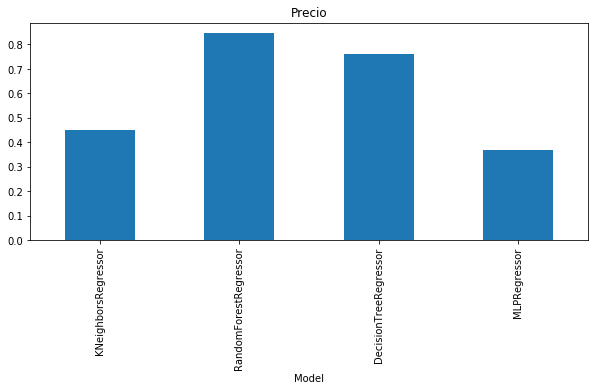

In [189]:
#Prueba 7

x_train, x_test, y_train, y_test = train_test_split(datosSinNullConFechas, datosSinNullConFechas['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [190]:
datosSinNullConFechasFeatures = datosSinNullConFechas.drop('price_aprox_usd',1)
datosSinNullConFechasPrecios = datosSinNullConFechas.loc[:, ['price_aprox_usd']]

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosSinNullConFechasFeatures, np.ravel(datosSinNullConFechasPrecios), cv=5)
scores

array([ 0.39162159,  0.94040855,  0.89921241,  0.82022905,  0.83650378])

# Test con Set de Pruebas

In [192]:
datosForTesting['year'] = pd.DatetimeIndex(datosForTesting['created_on']).year
datosForTesting['month'] = pd.DatetimeIndex(datosForTesting['created_on']).month
datosForTestingFecha = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type','year','month']]
datosForTestingFecha = pd.get_dummies(datosForTestingFecha, prefix=['property_type'])

In [185]:
sextaPrueba = datosForTestingFecha

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(sextaPrueba)


RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(datosSinNullConFechasFeatures, datosSinNullConFechasPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba6 = RFRModel.predict(imp.fit_transform(sextaPrueba))

# Pruebas con OHC en Barrios

In [193]:
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['price_aprox_usd'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['rooms'].notnull(),:]
datosSinNull['year'] = pd.DatetimeIndex(datosSinNull['created_on']).year
datosSinNull['month'] = pd.DatetimeIndex(datosSinNull['created_on']).month

datosSinNullOHC = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd', 'place_name' ,'surface_covered_in_m2','property_type','year','month','rooms']]

In [195]:
datosSinNullOHCWithDummies = pd.get_dummies(datosSinNullOHC)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


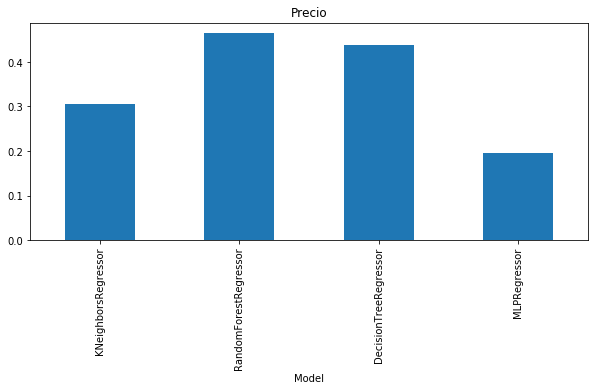

In [196]:
#Prueba 8

x_train, x_test, y_train, y_test = train_test_split(datosSinNullOHCWithDummies, datosSinNullOHCWithDummies['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [ ]:
datosSinNullOHCWithDummiesFeatures = datosSinNullOHCWithDummies.drop('price_aprox_usd',1)
datosSinNullOHCWithDummiesPrecios = datosSinNullOHCWithDummies.loc[:, ['price_aprox_usd']]

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosSinNullOHCWithDummiesFeatures, np.ravel(datosSinNullOHCWithDummiesPrecios), cv=5)
scores

In [ ]:
datosForTesting['year'] = pd.DatetimeIndex(datosForTesting['created_on']).year
datosForTesting['month'] = pd.DatetimeIndex(datosForTesting['created_on']).month
datosForTestingOHC = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2','place_name' ,'surface_covered_in_m2','property_type','year','month','rooms']]
datosForTestingOHC = pd.get_dummies(datosForTestingOHC)

# Type y Barrios con OHC

In [197]:
datosSinNull['year'] = pd.DatetimeIndex(datosSinNull['created_on']).year
datosSinNull['month'] = pd.DatetimeIndex(datosSinNull['created_on']).month

def split_place_with_parent_names_localidad(x):
    z=x.split("|")
    return z[3]

datosSinNull['localidad'] = datosSinNull['place_with_parent_names'].map(split_place_with_parent_names_localidad)
datosForTesting['localidad'] = datosForTesting['place_with_parent_names'].map(split_place_with_parent_names_localidad)

In [198]:
localidades = datosForTesting['localidad'].unique()


def localidadEnSet(x):
    return x in localidades.tolist()


datosSinNull['localidadEnSet'] = datosSinNull['localidad'].map(localidadEnSet)
datosSamePlaces = datosSinNull.loc[datosSinNull['localidadEnSet'] == True, :]



In [199]:
datosSamePlacesFiltered = datosSamePlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd', 'localidad' ,'surface_covered_in_m2','property_type','year','month']]
datosSamePlacesFiltered = pd.get_dummies(datosSamePlacesFiltered)

# Entrenamiento

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


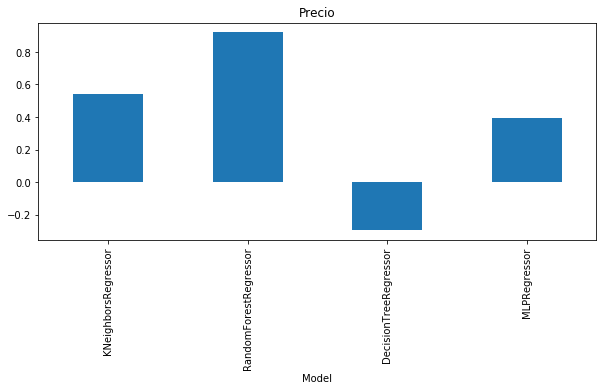

In [200]:
#Prueba 9

x_train, x_test, y_train, y_test = train_test_split(datosSamePlacesFiltered, datosSamePlacesFiltered['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [201]:
datosSamePlacesFilteredFeatures = datosSamePlacesFiltered.drop('price_aprox_usd',1)
datosSamePlacesFilteredPrecios = datosSamePlacesFiltered.loc[:, ['price_aprox_usd']]

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosSamePlacesFilteredFeatures, np.ravel(datosSamePlacesFilteredPrecios), cv=5)
scores

array([ 0.25904793,  0.96279697,  0.89320367,  0.84678769,  0.90037426])

# Set de datos de prueba

In [203]:
datosForTesting['year'] = pd.DatetimeIndex(datosForTesting['created_on']).year
datosForTesting['month'] = pd.DatetimeIndex(datosForTesting['created_on']).month

datosForTestingFiltered = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2','property_type' ,'localidad' ,'surface_covered_in_m2','year','month']]
datosForTestingFiltered = pd.get_dummies(datosForTestingFiltered)

octavaPrueba = datosForTestingFiltered

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(octavaPrueba)
impColumns = Imputer()
impColumns.fit_transform(octavaPrueba)
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(datosSamePlacesFilteredFeatures, datosSamePlacesFilteredPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba8 = RFRModel.predict(imp.fit_transform(octavaPrueba))

# Agrupamos por Comunas

Creamos un csv de comunas para Capital Federal. Para el caso de Buenos Aires, asociamos el state name 

In [211]:


datosSinNull['year'] = pd.DatetimeIndex(datosSinNull['created_on']).year
datosSinNull['month'] = pd.DatetimeIndex(datosSinNull['created_on']).month


datosForTesting['year'] = pd.DatetimeIndex(datosForTesting['created_on']).year
datosForTesting['month'] = pd.DatetimeIndex(datosForTesting['created_on']).month

comunas = pd.read_csv('resources/comunas.csv')

In [212]:
datosSinNull['tipo'] = 'train'
datosForTesting['tipo'] = 'test'
concat_df = pd.concat([datosSinNull , datosForTesting])

In [213]:
datosConComunas = pd.merge(concat_df, comunas, left_on='place_name', right_on='barrio',how='left')

In [214]:
datosConComunas.loc[datosConComunas['barrio'].isnull(), 'barrio'] = datosConComunas['state_name']
datosConComunas.loc[datosConComunas['state_name'] == 'Bs.As. G.B.A. Zona Sur', 'comuna'] = '17' 
datosConComunas.loc[datosConComunas['state_name'] == 'Bs.As. G.B.A. Zona Norte', 'comuna'] = '18'
datosConComunas.loc[datosConComunas['state_name'] == 'Bs.As. G.B.A. Zona Oeste', 'comuna'] = '19'
datosConComunas.loc[datosConComunas['state_name'] == 'Buenos Aires Interior', 'comuna'] = '20'
datosConComunas.loc[:, 'comuna'] = 'Comuna '+ datosConComunas['comuna'].astype(str)

In [215]:
datosConComunasFiltered = datosConComunas.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd','surface_covered_in_m2','property_type','comuna','year','month','tipo']]

In [216]:
datosConComunasFilteredOHC = pd.get_dummies(datosConComunasFiltered)
#datosConComunasFilteredOHC.columns

trainConComunas = datosConComunasFilteredOHC[datosConComunasFilteredOHC['tipo_train'] == 1]
testConComunas = datosConComunasFilteredOHC[datosConComunasFilteredOHC['tipo_test'] == 1]

# Drop your labels
trainConComunas = trainConComunas.drop(['tipo_train','tipo_test'], axis=1)
testConComunas = testConComunas.drop(['tipo_train','tipo_test'], axis=1)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


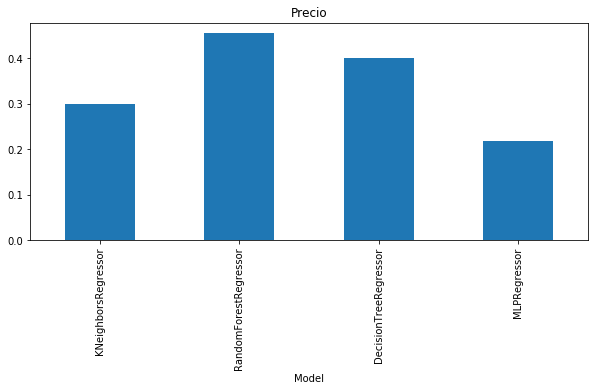

In [217]:
#Prueba 9

x_train, x_test, y_train, y_test = train_test_split(trainConComunas, trainConComunas['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [218]:
datosOHCFeatures = trainConComunas.drop('price_aprox_usd',1)
datosOHCPrecios = trainConComunas.loc[:, ['price_aprox_usd']]

In [219]:
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosOHCFeatures, np.ravel(datosOHCPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.33597288,  0.96339663,  0.88586985,  0.8217689 ,  0.89190714])

# Set de Datos de Prueba

In [220]:
novenaPrueba = testConComunas.drop('price_aprox_usd', axis=1)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(novenaPrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(datosOHCFeatures, datosOHCPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba9 = RFRModel.predict(imp.fit_transform(novenaPrueba))

# Expensas

Agregamos el valor de las expensas como parte de entrenamiento

In [221]:
datosConComunasFiltered = datosConComunas.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd','surface_covered_in_m2','property_type','comuna','year','month','tipo', 'expenses']]
datosConComunasFilteredOHC = pd.get_dummies(datosConComunasFiltered)


trainConComunasyExpenses = datosConComunasFilteredOHC[datosConComunasFilteredOHC['tipo_train'] == 1]
testConComunasyExpenses = datosConComunasFilteredOHC[datosConComunasFilteredOHC['tipo_test'] == 1]


trainConComunasyExpenses = trainConComunasyExpenses.drop(['tipo_train','tipo_test'], axis=1)
testConComunasyExpenses = testConComunasyExpenses.drop(['tipo_train','tipo_test'], axis=1)


In [ ]:
#Prueba 10

x_train, x_test, y_train, y_test = train_test_split(trainConComunasyExpenses, trainConComunasyExpenses['price_aprox_usd'], test_size=0.2)

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [ ]:
datosExpensesFeatures = trainConComunasyExpenses.drop('price_aprox_usd',1)
datosExpensesPrecios = trainConComunasyExpenses.loc[:, ['price_aprox_usd']]

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosExpensesFeatures, np.ravel(datosExpensesPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.39319107,  0.93250573,  0.89802838,  0.80779864,  0.82676582])

# Set de Datos de Prueba

In [ ]:
decimaPrueba = testConComunasyExpenses.drop('price_aprox_usd', axis=1)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(decimaPrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(datosExpensesFeatures, datosExpensesPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba10 = RFRModel.predict(imp.fit_transform(decimaPrueba))

# Rooms 

Agregamos el valor de las habitaciones. Intentamos generar un valor de rooms mediana por tipo de propiedad

In [226]:
datosRooms = datosConComunas.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd','surface_covered_in_m2','property_type','comuna','year','month','tipo', 'rooms']]
datosRooms = pd.get_dummies(datosRooms)


trainRooms= datosRooms[datosRooms['tipo_train'] == 1]
testRooms = datosRooms[datosRooms['tipo_test'] == 1]


trainRooms = trainRooms.drop(['tipo_train','tipo_test'], axis=1)
testRooms = testRooms.drop(['tipo_train','tipo_test'], axis=1)

testDptos = testRooms[testRooms['property_type_departamento'] == 1]
testCasas = testRooms[testRooms['property_type_casa'] == 1]
testPH = testRooms[testRooms['property_type_ph'] == 1]


In [227]:
testRooms.loc[testRooms['property_type_departamento'] == 1, 'rooms'] = imp.fit_transform(testDptos[['rooms']]).ravel()
testRooms.loc[testRooms['property_type_casa'] == 1, 'rooms'] = imp.fit_transform(testCasas[['rooms']]).ravel()
testRooms.loc[testRooms['property_type_ph'] == 1, 'rooms'] = imp.fit_transform(testPH[['rooms']]).ravel()

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


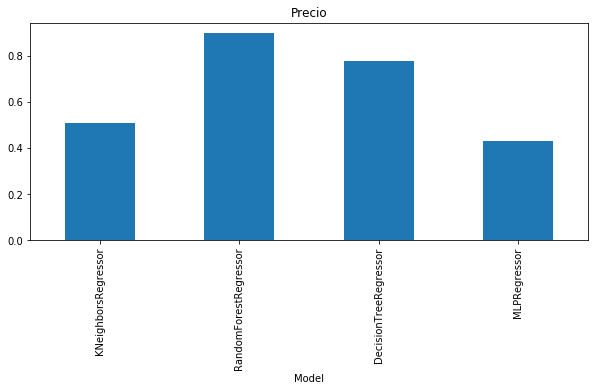

In [228]:
#Prueba 11

x_train, x_test, y_train, y_test = train_test_split(trainRooms, trainRooms['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [229]:
trainRoomsFeatures = trainRooms.drop('price_aprox_usd',1)
trainRoomsPrecios = trainRooms.loc[:, ['price_aprox_usd']]

In [230]:
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, trainRoomsFeatures, np.ravel(trainRoomsPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.34701961,  0.96234522,  0.8873004 ,  0.82732948,  0.89537894])

# Set de Test

In [231]:
oncePrueba = testRooms.drop('price_aprox_usd', axis=1)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(oncePrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(trainRoomsFeatures, trainRoomsPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba11 = RFRModel.predict(imp.fit_transform(oncePrueba))

# Testeamos con mas limpieza de datos

##### Ademas de limpieza, sacamos la superficie cubierta 

In [234]:
datosForOtrosModelos = datosConComunas.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd','surface_covered_in_m2','property_type','comuna','year','month','tipo']]
datosForOtrosModelos = pd.get_dummies(datosForOtrosModelos)


trainModelos= datosForOtrosModelos[datosForOtrosModelos['tipo_train'] == 1]
testModelos = datosForOtrosModelos[datosForOtrosModelos['tipo_test'] == 1]


trainModelos = trainModelos.drop(['tipo_train','tipo_test'], axis=1)
testModelos = testModelos.drop(['tipo_train','tipo_test'], axis=1)

In [235]:
trainModelos = trainModelos.loc[trainModelos['surface_total_in_m2'].notnull(),:]
trainModelos = trainModelos.loc[trainModelos['surface_covered_in_m2'].notnull(),:]
trainModelos = trainModelos.loc[trainModelos['surface_covered_in_m2'] < trainModelos['surface_total_in_m2'],:]

trainModelos.drop_duplicates(subset=None, keep='first', inplace=True)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


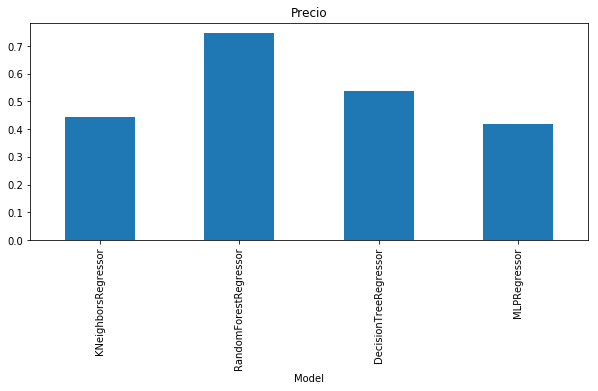

In [236]:

x_train, x_test, y_train, y_test = train_test_split(trainModelos, trainModelos['price_aprox_usd'], test_size=0.2)

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [237]:
trainModelosFeatures = trainModelos.drop('price_aprox_usd',1)
trainModelosPrecios = trainModelos.loc[:, ['price_aprox_usd']]

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, trainModelosFeatures, np.ravel(trainModelosPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.14348659,  0.77547461,  0.74715743,  0.66319313,  0.72171746])

# Set de Entrenamiento

In [ ]:
docePrueba = testModelos.drop('price_aprox_usd', axis=1)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(docePrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(trainModelosFeatures, trainModelosPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba12 = RFRModel.predict(imp.fit_transform(docePrueba))

# Reducimos cantidad de Precios y sacamos covered m2

In [238]:
datosForOtrosModelos = datosConComunas.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd','property_type','comuna','year','month','tipo']]
datosForOtrosModelos = pd.get_dummies(datosForOtrosModelos)


trainModelos= datosForOtrosModelos[datosForOtrosModelos['tipo_train'] == 1]
testModelos = datosForOtrosModelos[datosForOtrosModelos['tipo_test'] == 1]


trainModelos = trainModelos.drop(['tipo_train','tipo_test'], axis=1)
testModelos = testModelos.drop(['tipo_train','tipo_test'], axis=1)

trainModelosTenMillon = trainModelos.loc[trainModelos['price_aprox_usd'] < 11000000,:]

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


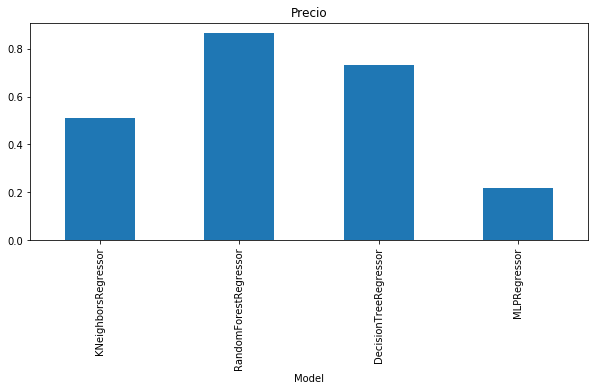

In [239]:

#clf.fit(X_train, y_train)
         #ensemble.GradientBoostingClassifier({'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
         #          'min_samples_split': 5})

x_train, x_test, y_train, y_test = train_test_split(trainModelosTenMillon, trainModelosTenMillon['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [240]:
trainModelosTenMillonFeatures = trainModelosTenMillon.drop('price_aprox_usd',1)
trainModelosTenMillonPrecios = trainModelosTenMillon.loc[:, ['price_aprox_usd']]

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, trainModelosTenMillonFeatures, np.ravel(trainModelosTenMillonPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.68336198,  0.94085297,  0.8397369 ,  0.82596222,  0.88257716])

# Set de Pruebas

In [241]:
catorcePrueba = testModelos.drop('price_aprox_usd', axis=1)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(catorcePrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(trainModelosTenMillonFeatures, trainModelosTenMillonPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba14 = RFRModel.predict(imp.fit_transform(catorcePrueba))

# Prueba de rooms, pero con mas limpieza de datos

In [242]:
datosRoomsLindas = datosConComunas.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2','price_aprox_usd','property_type','comuna','year','month','tipo', 'rooms']]
datosRoomsLindas = pd.get_dummies(datosRoomsLindas)

testRoomsLindas = datosRoomsLindas[datosRoomsLindas['tipo_test'] == 1]


datosRoomsLindas = datosRoomsLindas.loc[datosRoomsLindas['price_aprox_usd'].notnull(),:]
datosRoomsLindas = datosRoomsLindas.loc[datosRoomsLindas['rooms'].notnull(),:]
datosRoomsLindas = datosRoomsLindas.loc[datosRoomsLindas['rooms'] < 10,:]


trainRoomsLindas= datosRoomsLindas[datosRoomsLindas['tipo_train'] == 1]
trainRoomsLindas = trainRoomsLindas.drop(['tipo_train','tipo_test'], axis=1)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


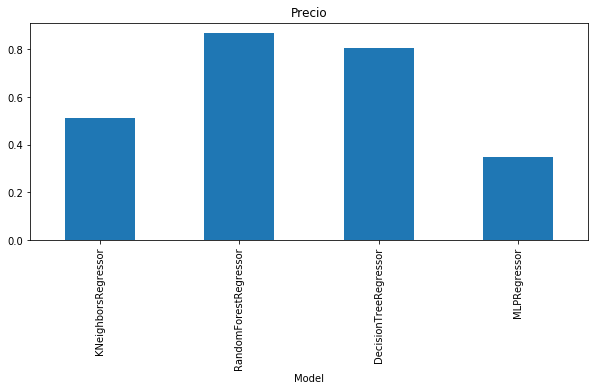

In [243]:
x_train, x_test, y_train, y_test = train_test_split(trainRoomsLindas, trainRoomsLindas['price_aprox_usd'], test_size=0.2)

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [244]:
trainRoomsLindasFeatures = trainRoomsLindas.drop('price_aprox_usd',1)
trainRoomsLindasPrecios = trainRoomsLindas.loc[:, ['price_aprox_usd']]

In [245]:
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, trainRoomsLindasFeatures, np.ravel(trainRoomsLindasPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.33430616,  0.96441955,  0.88577738,  0.81813194,  0.89543982])

# Set Pruebas de datos

In [246]:
testRoomsLindas = testRoomsLindas.drop(['tipo_train','tipo_test'], axis=1)


quincePrueba = testRoomsLindas.drop('price_aprox_usd', axis=1)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(quincePrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(trainRoomsLindasFeatures, trainRoomsLindasPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba15 = RFRModel.predict(imp.fit_transform(quincePrueba))